# Solução para o problema do kaggle do titanic

Essa solução faz parte do programa de Iniciação cientifica, a resolução foi proposta pelo meu professor e orientador Rodrigo sanches miane.

In [40]:
# As bibliotecas que usaremos
import pandas as PD
from pandas import DataFrame
import matplotlib.pyplot as plt


In [41]:
data_training = PD.read_csv("train.csv", sep=',', low_memory=False)

data_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:

# Passo 1 - entender os dados.
data_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


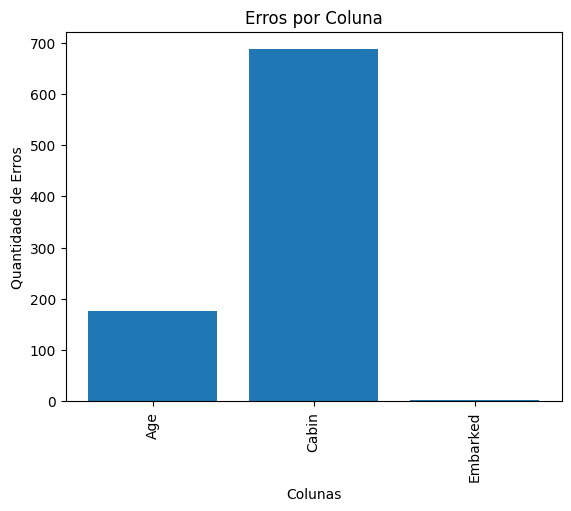

In [43]:
# Dados da variável data_col_erros
data_col_erros = data_training.isna().sum()

data_col_erros = data_col_erros[data_col_erros > 0]

# Obtendo os nomes das colunas
colunas = data_col_erros.index.tolist()

# Obtendo os valores dos erros
erros = data_col_erros.values.tolist()

# Plotando o gráfico de barras
plt.bar(colunas, erros)

# Adicionando rótulos aos eixos x e y
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Erros')

# Adicionando um título ao gráfico
plt.title('Erros por Coluna')

# Rotacionando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.show()

In [44]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Como vimos temos muito pouco valores não nulos na coluna Cabine estão os dados dela não será tratado.
* a coluna idade nós a preencheremos com a média das idades.

In [45]:
# obtendo a média dos valores da coluna idade
middle_age =  data_training['Age'].sum() // len(data_training['Age'])

# substituindo as linhas com valores faltantes pela média
data_training_cleared = data_training.fillna(value=middle_age)

In [55]:
# Trocando a coluna sexo de str para int
data_training_cleared['Sex'] = data_training_cleared['Sex'].replace({'male':1, 'female':0})

In [56]:
data_training_cleared

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,23.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,23.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,23.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,23.0,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,23.0,1,2,W./C. 6607,23.4500,23.0,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [59]:
data_test = PD.read_csv("test.csv", sep=',', low_memory=False)

In [60]:
data_training.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [61]:
data_training.drop_duplicates(subset='Embarked')

# data_training['Embarked' not in ['S','C', 'Q']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN


In [62]:
types = data_training.dtypes
types = types[types != int]

types

Name         object
Sex          object
Age         float64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# dados = pd.concat([pd.read_csv("./task5/trafego.csv"), pd.read_csv("./task5/malicioso.cvs")])

iris = load_iris()

training_target = np.array(data_training_cleared['Survived'])

training_data = np.array(data_training_cleared.drop(columns=['Survived']))

test_data = np.array(data_test)

'''
# Dividindo os dados em conjunto de treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

print(X_test, end='\n\n')
print(X_train, end='\n\n')
print(y_train, end='\n\n')
print(y_test, end='\n\n')
'''

# Criando um objeto DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Treinando o classificador
# clf.fit(X_train, y_train)
clf.fit(training_data, training_target)

# Fazendo previsões no conjunto de teste
y_pred = clf.predict(test_data)

teste_target = PD.read_csv("gender_submission.csv")

teste_target = np.array(teste_target['Survived'])

# Avaliando a precisão das previsões
accuracy = accuracy_score(teste_target, y_pred)
print("Acurácia:", accuracy)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
import pandas as pd
import ydata_profiling as prof

# DataFrame original
data = {'Coluna1': [1, 2, 3, 4, 5],
        'Coluna2': [6, 7, 8, 9, 10]}
df_original = pd.DataFrame(data)

# DataFrame após a remoção de linhas
df_removido = df_original.drop([2, 4])  # Exemplo: removendo linhas de índices 2 e 4

# Obtendo as linhas removidas
linhas_removidas = df_original[~df_original.index.isin(df_removido.index)]

# Gerando o perfil das linhas removidas
profile = prof.ProfileReport(linhas_removidas, minimal=True)

# Exibindo o relatório do perfil
profile.to_file("linhas_removidas_report.html")


/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 863.20it/s]


In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# DataFrame de exemplo com uma coluna categórica
data = {'Cor': ['vermelho', 'verde', 'azul', 'vermelho']}
df = pd.DataFrame(data)

# Codificação one-hot
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df[['Cor']]).toarray(), columns=encoder.categories_[0])

print(df_encoded)

   azul  verde  vermelho
0   0.0    0.0       1.0
1   0.0    1.0       0.0
2   1.0    0.0       0.0
3   0.0    0.0       1.0
